In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/own/Schneider/Assignment 2/data/output/clean_data.csv")
description_raw = df.description

In [ ]:
df

# Flair

In [ ]:
# !pip install flair

In [7]:
from flair.data import Sentence
from flair.embeddings import StackedEmbeddings, FlairEmbeddings
from flair.embeddings import TransformerDocumentEmbeddings
from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings, DocumentPoolEmbeddings
from flair.embeddings import SentenceTransformerDocumentEmbeddings

ModuleNotFoundError: ignored

In [ ]:
# document rnn
stacked_embeddings = StackedEmbeddings([
    WordEmbeddings('glove'), 
    FlairEmbeddings('news-forward'), 
    FlairEmbeddings('news-backward')
])

document_embedding = DocumentRNNEmbeddings([stacked_embeddings])

embedding_list = []

for i in description_raw:
    sent = Sentence(i)
    document_embedding.embed(sent)
    embedding_list.append(sent.get_embedding().detach().cpu().numpy())

In [5]:
import pickle
embedding_list = pickle.load(open('/content/drive/MyDrive/own/Schneider/Assignment 2/data/output/embeddings/final_emb.pkl', 'rb'))

In [ ]:
ax = plt.hist(embedding_list, bins = 100)

In [8]:
from sklearn.decomposition import PCA

0.41517870073190855
0.5770026793324612
0.6839248879597777
0.7619094532125439
0.8203058792249682
0.8655549794081762
0.90046940028848
0.9285709893502614
0.9511000439617334
0.9690744516968307
0.9832013180212729
0.993864398905652


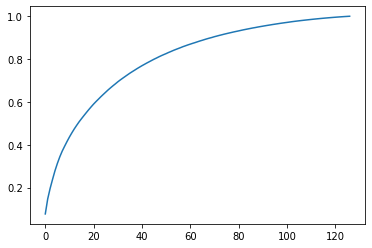

In [19]:
explained_variance_ratio = []
for i in range(1, 128):
    pca = PCA(n_components=i)
    pca.fit(embedding_list)
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))
    if i % 10 == 0:
        print (explained_variance_ratio[-1])

plt.plot(explained_variance_ratio)

In [22]:
pca_final = PCA(n_components=40)
X = pca_final.fit_transform(embedding_list)

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
labels = kmeans.labels_

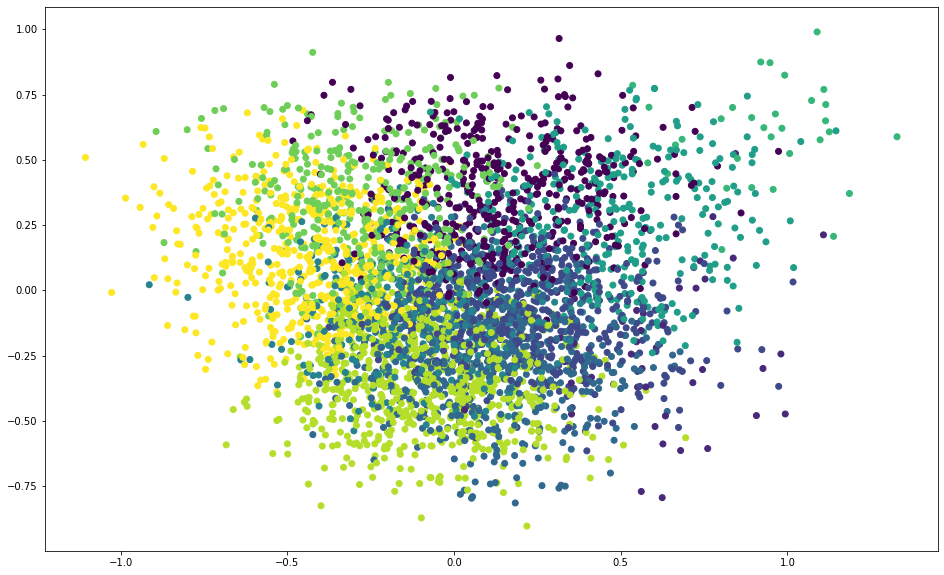

In [25]:
plt.figure(figsize = (16, 10))
plt.scatter(X[:, 0], X[:, 1], c = labels)

In [ ]:
silhouette_score(X, labels)

0.057587553757304864

In [28]:
# tensorboard
pd.DataFrame(embedding_list).to_csv("output.tsv", sep='\t', header = Fale)

# tsne

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(embedding_list)

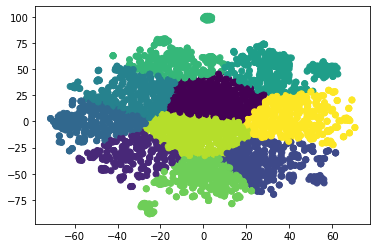

In [ ]:
kmeans_tsne = KMeans(n_clusters = 10)
kmeans_tsne.fit(X_tsne)
labels_tsne = kmeans_tsne.labels_

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = labels_tsne)

In [ ]:
silhouette_score(X_tsne, labels_tsne)

0.35287097

In [ ]:
pickle.dump(embedding_list, open("/content/drive/MyDrive/own/Schneider/Assignment 2/data/output/embeddings/final_emb.pkl", 'wb'))
# pickle.dump()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
t = TSNE(
    n_components = 2,
    #  metric = cosine_similarity
)

In [ ]:
arr = np.array(embedding_list)
arr.shape

(4265, 128)

In [ ]:
# tsne = TSNE(n_components=2)
X_tsne_cs = t.fit_transform(embedding_list)

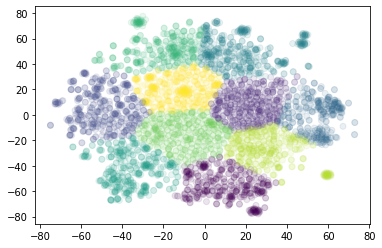

In [ ]:
kmeans_tsne = KMeans(n_clusters = 10)
kmeans_tsne.fit(X_tsne_cs)
labels_tsne_cs = kmeans_tsne.labels_

plt.scatter(X_tsne_cs[:, 0], X_tsne_cs[:, 1], c = labels_tsne_cs, alpha = 0.1)

In [ ]:
df['new_l'] = df.listed_in.apply(lambda x: list(x.split(", ")))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'new_l'],
      dtype='object')